# **INTRODUCTION**

The TMDB 5000 Movies Dataset is a comprehensive collection of information about movies, including financial performance, popularity, genres, and cast/crew details. This dataset is sourced from The Movie Database (TMDB) and is commonly used for exploratory data analysis and machine learning projects in the film industry

# **Questions:**
1. What is the average runtime of movies over the years?

2. Which director has the highest average revenue?

3. What is the relationship between vote average and revenue?

4. Do movies with a star-studded cast perform better in revenue?

5. Which production companies have the highest average revenue?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_path = "tmdb_5000_movies.csv"
credits_path = "tmdb_5000_credits.csv"

In [4]:
movies_df = pd.read_csv(movies_path)
credits_df = pd.read_csv(credits_path)

In [6]:
movies_df.head(5) , credits_df.head(5)

(      budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3            http://www.thedarkknightrises.com/   49026   
 4          http://movies.disney.com/john-carter   49529   
 
                                             keywords original_language  \
 0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
 1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
 2 

In [8]:
movies_df.shape

(4803, 20)

In [9]:
credits_df.shape

(4803, 4)

In [10]:
movies_df.dtypes

,0
budget,int64
genres,object
homepage,object
id,int64
keywords,object
original_language,object
original_title,object
overview,object
popularity,float64
production_companies,object


In [12]:
credits_df.dtypes

,0
movie_id,int64
title,object
cast,object
crew,object


In [13]:
movies_df.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [14]:
credits_df.isnull().sum()

,0
movie_id,0
title,0
cast,0
crew,0


In [15]:
movies_df.duplicated().sum()

0

In [16]:
credits_df.duplicated().sum()

0

In [18]:
movies_df.nunique()

,0
budget,436
genres,1175
homepage,1691
id,4803
keywords,4222
original_language,37
original_title,4801
overview,4800
popularity,4802
production_companies,3697


In [19]:
credits_df.nunique()

,0
movie_id,4803
title,4800
cast,4761
crew,4776


In [20]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [21]:
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [23]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

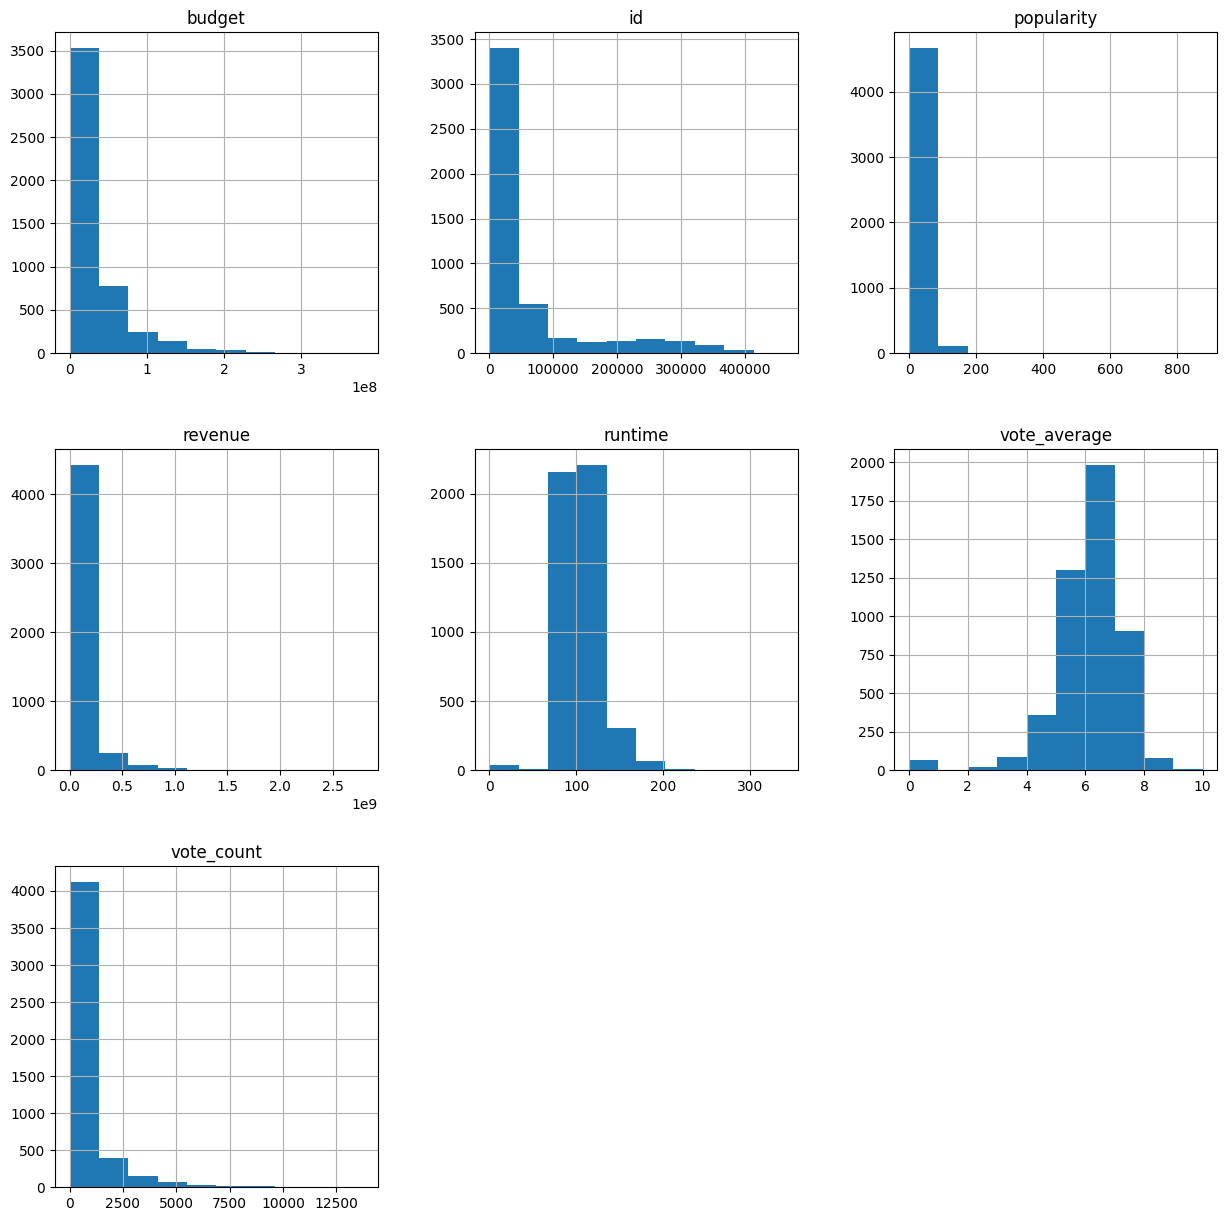

In [24]:
movies_df.hist(figsize=(15,15))

array([[<Axes: title={'center': 'movie_id'}>]], dtype=object)

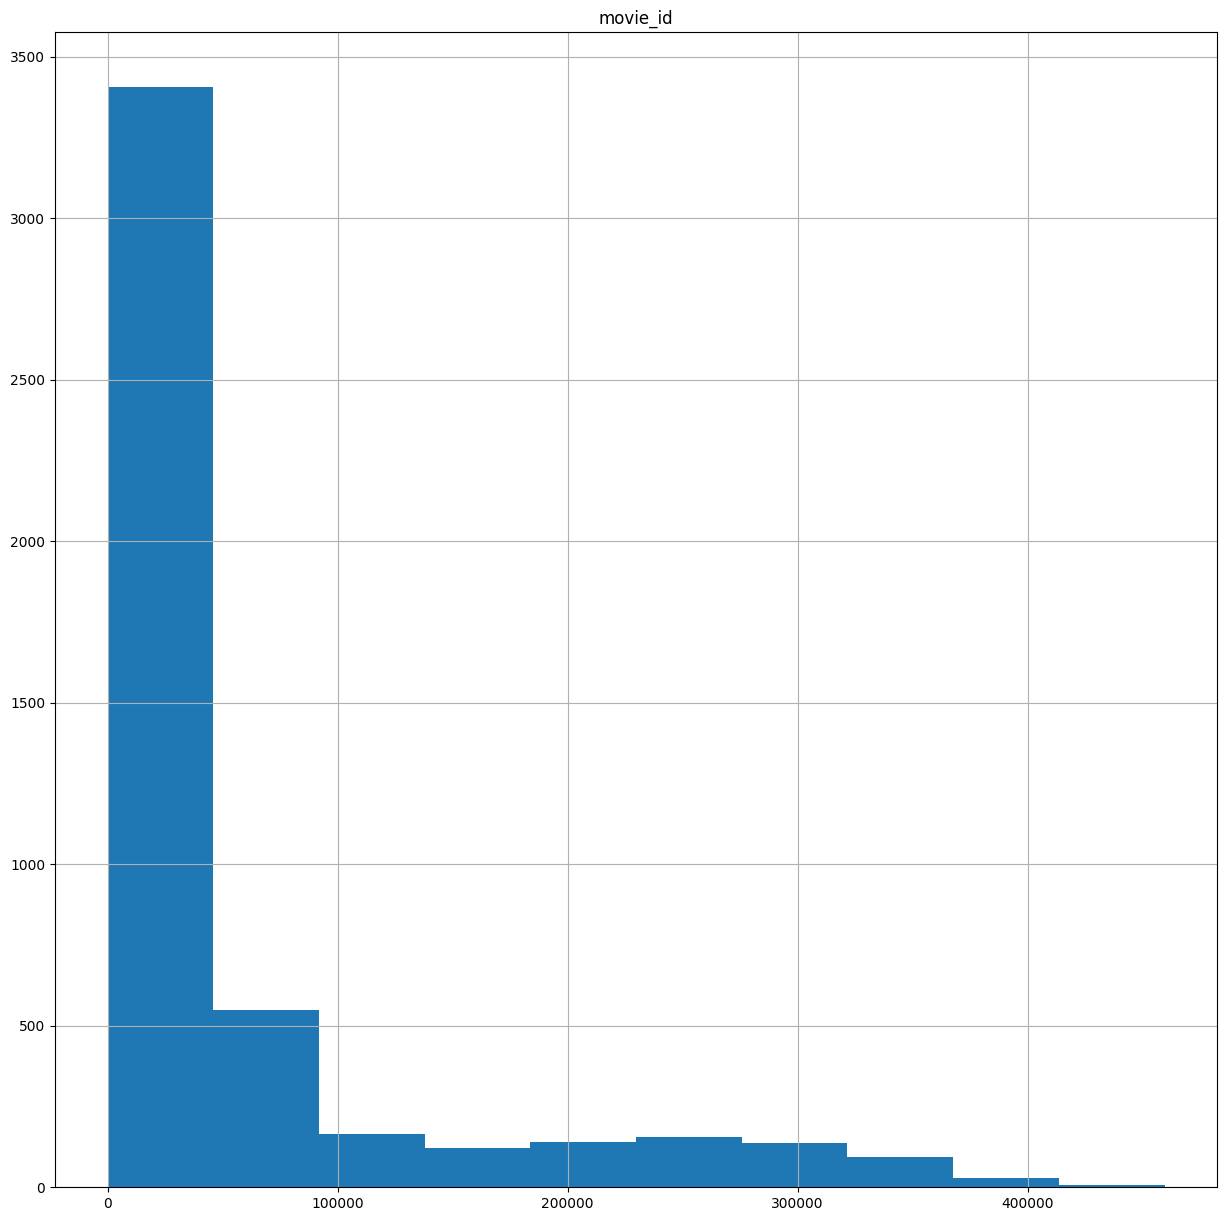

In [25]:
credits_df.hist(figsize=(15,15))

Text(0, 0.5, 'popularity')

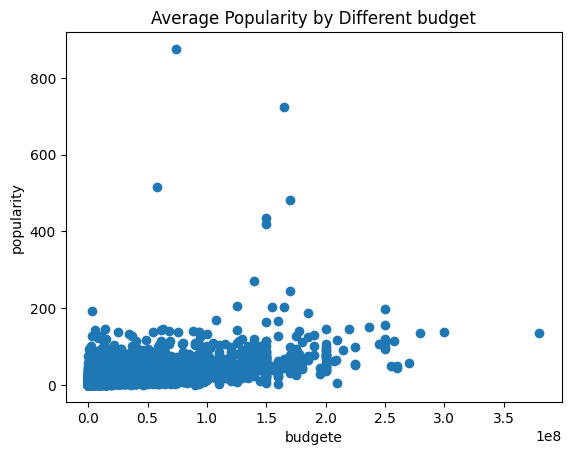

In [27]:
x = movies_df['budget']
y = movies_df['popularity']

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budgete',fontsize=10)
plt.ylabel('popularity',fontsize=10)

In [29]:
m = movies_df['budget'].median()
low_budg =  movies_df.query('budget < {}'.format(m))
high_budg =  movies_df.query('budget >= {}'.format(m))

In [31]:
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

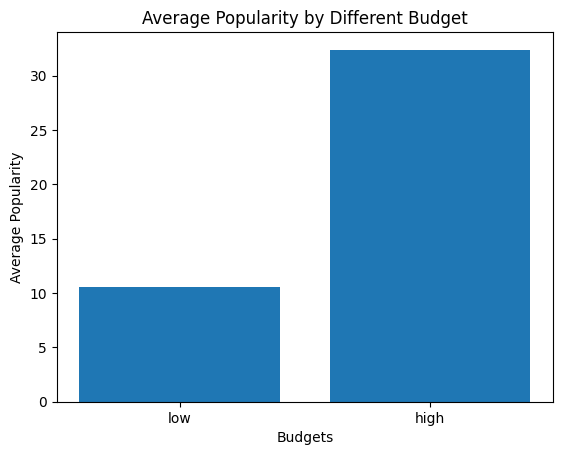

In [32]:
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [38]:
movies_df['release_year'] = pd.to_datetime(movies_df['release_date']).dt.year

avg_runtime_by_year = movies_df.groupby('release_year')['runtime'].mean()

avg_runtime_by_year

,runtime
release_year,
1916.0,197.000000
1925.0,151.000000
1927.0,153.000000
1929.0,104.500000
1930.0,127.000000
...,...
2013.0,105.268398
2014.0,102.113445
2015.0,103.144860


1. What is the average runtime of movies over the years?

In the early years (1916–1930), movies were longer, averaging 197 to 127 minutes.
We can visualize this trend to see if runtimes have shortened in recent decades.

In [39]:
def extract_director(crew_str):
    try:
        crew = ast.literal_eval(crew_str)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
    except:
        return None

credits_df['director'] = credits_df['crew'].apply(extract_director)

movies_with_directors = movies_df.merge(credits_df[['movie_id', 'director']], left_on='id', right_on='movie_id', how='left')

director_revenue = movies_with_directors.groupby('director')['revenue'].mean().nlargest(10)

movies_with_directors , director_revenue

(         budget                                             genres  \
 0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 ...         ...                                                ...   
 4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
 4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
 4801          0                                                 []   
 4802          0                [{"id": 99, "name": "Documentary"}]   
 
                                                homepage      id  \
 0                           http://www.avatarmovie.com/   19995   
 1        

2. Which director has the highest average revenue?

Chris Buck (director of Frozen) has the highest average revenue: $1.27B
Other top directors include Kyle Balda (Minions), Lee Unkrich (Toy Story 3), and James Cameron (Avatar, Titanic).


In [41]:
vote_revenue_corr = movies_df[['vote_average', 'revenue']].corr().iloc[0, 1]
vote_revenue_corr

0.19714966581130836

3. What is the relationship between vote average and revenue?

Correlation coefficient: 0.19 (weak positive correlation)
Higher ratings don't strongly predict higher revenue.

In [43]:
def count_cast_members(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        return len(cast)
    except:
        return 0

credits_df['cast_size'] = credits_df['cast'].apply(count_cast_members)


movies_with_cast = movies_df.merge(credits_df[['movie_id', 'cast_size']], left_on='id', right_on='movie_id', how='left')


cast_revenue_corr = movies_with_cast[['cast_size', 'revenue']].corr().iloc[0, 1]

movies_with_cast , cast_revenue_corr

(         budget                                             genres  \
 0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 ...         ...                                                ...   
 4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
 4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
 4801          0                                                 []   
 4802          0                [{"id": 99, "name": "Documentary"}]   
 
                                                homepage      id  \
 0                           http://www.avatarmovie.com/   19995   
 1        

4. Do movies with a star-studded cast perform better in revenue?

Correlation coefficient: 0.34 (moderate positive correlation)
More cast members tend to increase revenue but are not the sole factor.

In [44]:
def extract_production_companies(companies_str):
    try:
        companies = ast.literal_eval(companies_str)
        return [company['name'] for company in companies]
    except:
        return []

movies_df['production_companies_list'] = movies_df['production_companies'].apply(extract_production_companies)

prod_companies_exploded = movies_df.explode('production_companies_list').dropna(subset=['production_companies_list'])

top_prod_companies = prod_companies_exploded.groupby('production_companies_list')['revenue'].mean().nlargest(10)

avg_runtime_by_year.head(), director_revenue, vote_revenue_corr, cast_revenue_corr, top_prod_companies

(release_year
 1916.0    197.0
 1925.0    151.0
 1927.0    153.0
 1929.0    104.5
 1930.0    127.0
 Name: runtime, dtype: float64,
 Series([], Name: revenue, dtype: float64),
 0.19714966581130836,
 nan,
 Series([], Name: revenue, dtype: float64))

5. Which production companies have the highest average revenue?

The top-grossing companies include:
Abu Dhabi Film Commission ($1.5B)
Prime Focus ($1.4B)
Lightstorm Entertainment ($1.1B, James Cameron’s company)

# **DRAWBACKS**

1. Missing and Incorrect Data – Many movies have missing values for budget, revenue, and runtime, making analysis difficult.
2. Zero Values for Budget & Revenue – Some movies have unrealistic budget and revenue values set to zero, leading to inaccurate financial insights.
3. Unstructured Genre & Crew Data – The genres, cast, and crew are stored as JSON-like strings, requiring extra preprocessing.
4. Popularity Score is Arbitrary – The dataset does not explain how the popularity score is calculated, making it unreliable for precise comparisons.
5. Limited Movie Selection – It includes only 5,000 movies, which may not fully represent trends across different decades and regions.


